In [67]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

In [8]:
df = pd.read_csv("./income.csv")
print(df.shape)
df.head()

(22, 3)


,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


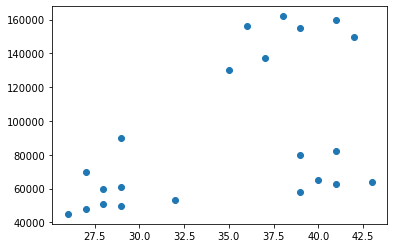

In [14]:
plt.scatter(df.Age, df['Income($)'])
plt.show()

In [17]:
km = KMeans(n_clusters=3)

In [19]:
y_prd = km.fit_predict(df[['Age', 'Income($)']])
y_prd

array([2, 2, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1])

In [25]:
df['cluter'] = y_prd
df.head()

,Name,Age,Income($),cluter
0,Rob,27,70000,2
1,Michael,29,90000,2
2,Mohan,29,61000,1
3,Ismail,28,60000,1
4,Kory,42,150000,0


Text(0, 0.5, 'Income ($)')

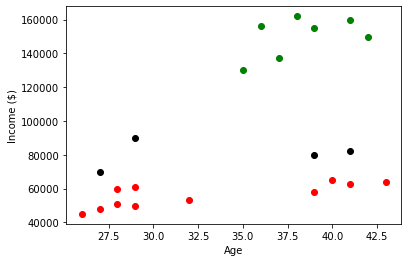

In [33]:
clt_0 = df[df.cluter == 0]
clt_1 = df[df.cluter == 1]
clt_2 = df[df.cluter == 2]
plt.scatter(clt_0.Age,clt_0['Income($)'],color='green')
plt.scatter(clt_1.Age,clt_1['Income($)'],color='red')
plt.scatter(clt_2.Age,clt_2['Income($)'],color='black')
plt.xlabel('Age')
plt.ylabel('Income ($)')

In [40]:
scalar = MinMaxScaler()
scalar.fit(df[['Income($)']])
df['Income($)'] = scalar.transform(df[['Income($)']])

In [43]:
scalar.fit(df[['Age']])
df['Age'] = scalar.transform(df[['Age']])

In [45]:
df.head()

,Name,Age,Income($),cluter
0,Rob,0.058824,0.213675,2
1,Michael,0.176471,0.384615,2
2,Mohan,0.176471,0.136752,1
3,Ismail,0.117647,0.128205,1
4,Kory,0.941176,0.897436,0


In [47]:
y_prd = km.fit_predict(df[['Age', 'Income($)']])
y_prd

array([1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2])

In [48]:
df['cluter'] = y_prd

In [61]:
km.cluster_centers_, km.cluster_centers_[:,0]

(array([[0.72268908, 0.8974359 ],
        [0.1372549 , 0.11633428],
        [0.85294118, 0.2022792 ]]),
 array([0.72268908, 0.1372549 , 0.85294118]))

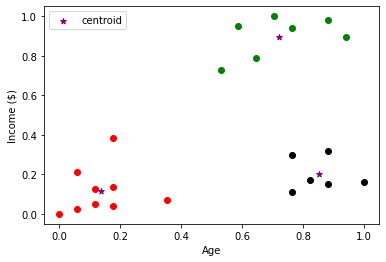

In [62]:
clt_0 = df[df.cluter == 0]
clt_1 = df[df.cluter == 1]
clt_2 = df[df.cluter == 2]
plt.scatter(clt_0.Age,clt_0['Income($)'],color='green')
plt.scatter(clt_1.Age,clt_1['Income($)'],color='red')
plt.scatter(clt_2.Age,clt_2['Income($)'],color='black')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.xlabel('Age')
plt.ylabel('Income ($)')
plt.legend()

In [68]:
sse = []
k_rng = range(1,10)
for k in range(1,10):
    km = KMeans(n_clusters=k)
    km.fit(df[['Age','Income($)']])
    sse.append(km.inertia_)

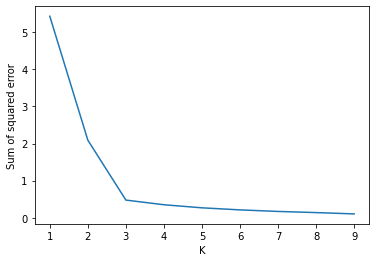

In [69]:
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse)